In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv(r"E:\EDA1\EDA1\Cardiotocographic.csv")

In [3]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [4]:
# Display the first few rows of the dataset
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [ ]:
# Data Cleaning and Preparation

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [ ]:
# Handle missing values if any (e.g., impute with mean or delete)
# Example: df.fillna(df.mean(), inplace=True)

In [6]:
# Check for data types and convert if necessary
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [ ]:
# Convert any numerical columns stored as strings
# Example: df['Column_Name'] = pd.to_numeric(df['Column_Name'], errors='coerce')


In [7]:
# Detect and treat outliers if necessary using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1,132.000000,0.006380,0.00000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.00000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.0
4,131.948232,0.006515,0.00000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.0
37,114.000000,0.004559,0.00000,0.004559,0.003040,0.0,0.0,24.0,3.2,0.000000,16.2,134.0,0.000000,1.0
50,NaN,NaN,0.00000,0.008086,0.000000,NaN,NaN,29.0,1.3,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113,136.000000,0.000000,0.00207,0.008282,0.000000,0.0,0.0,67.0,1.5,11.000000,4.7,38.0,0.000000,1.0
2117,140.000000,0.000000,0.00000,0.007812,0.000000,0.0,0.0,79.0,0.3,20.000000,8.5,26.0,1.002932,1.0
2118,140.000000,0.000000,0.00000,0.006470,0.000898,0.0,0.0,79.0,0.5,26.428179,7.0,21.0,1.000000,1.0
2119,140.000000,0.000000,0.00000,0.006764,0.001127,0.0,0.0,79.0,0.6,27.000000,6.4,26.0,1.000000,1.0


In [9]:
# Provide summary statistics for each column
summary_stats = df.describe()
print("Statistical summary:\n", summary_stats)

Statistical summary:
                LB          AC          FM          UC          DL     DS  \
count  885.000000  885.000000  898.000000  898.000000  898.000000  885.0   
mean   131.846366    0.004094    0.000604    0.004965    0.001543    0.0   
std      9.453055    0.003752    0.001344    0.002706    0.002213    0.0   
min    106.000000   -0.000122   -0.002467   -0.000101   -0.000124    0.0   
25%    125.000000    0.000000    0.000000    0.003145    0.000000    0.0   
50%    133.000000    0.003358    0.000000    0.005045    0.000000    0.0   
75%    138.000000    0.006747    0.000303    0.006928    0.003076    0.0   
max    160.000000    0.014068    0.006272    0.012072    0.008197    0.0   

          DP        ASTV        MSTV        ALTV        MLTV       Width  \
count  885.0  898.000000  898.000000  898.000000  885.000000  885.000000   
mean     0.0   42.453496    1.273574    3.146072    8.595633   67.757776   
std      0.0   15.055401    0.541507    6.027415    4.498767   32

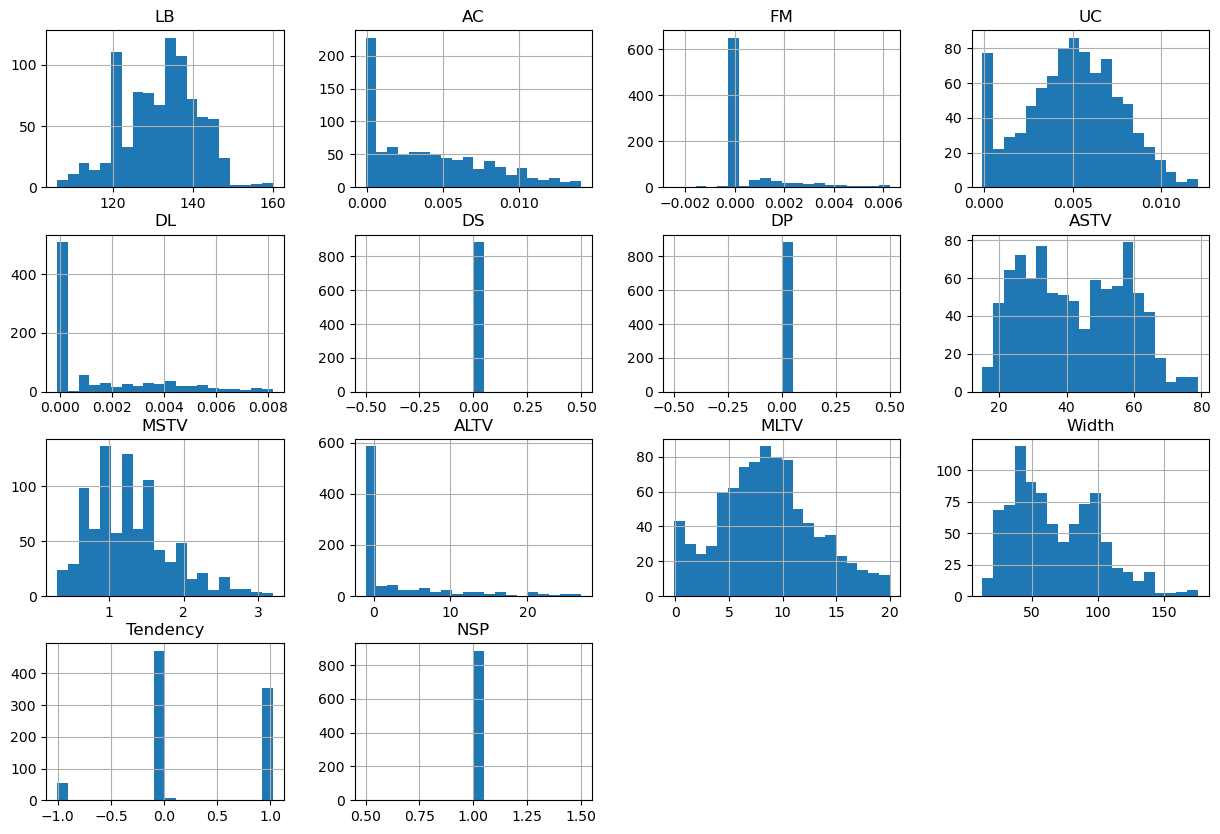

In [10]:
# Data Visualization

# Histograms for numerical variables
df.hist(bins=20, figsize=(15,10))
plt.show()

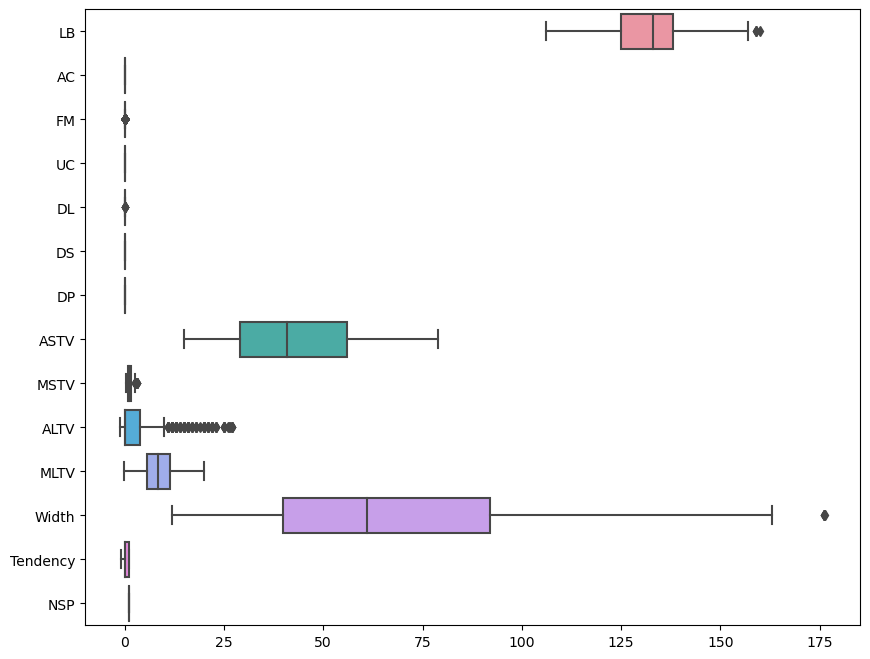

In [11]:
# Boxplots for numerical variables
plt.figure(figsize=(10,8))
sns.boxplot(data=df, orient="h")
plt.show()

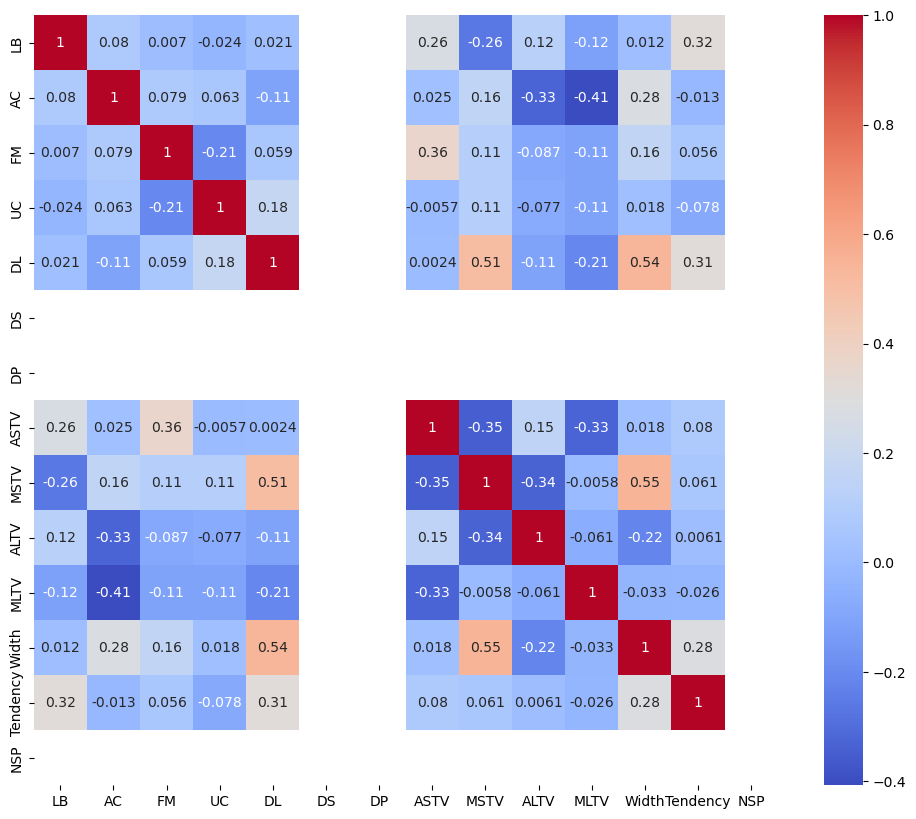

In [12]:
# Correlation heatmap to explore relationships between variables
plt.figure(figsize=(12,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

C:\Users\ravik\Downloads\dekstop\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


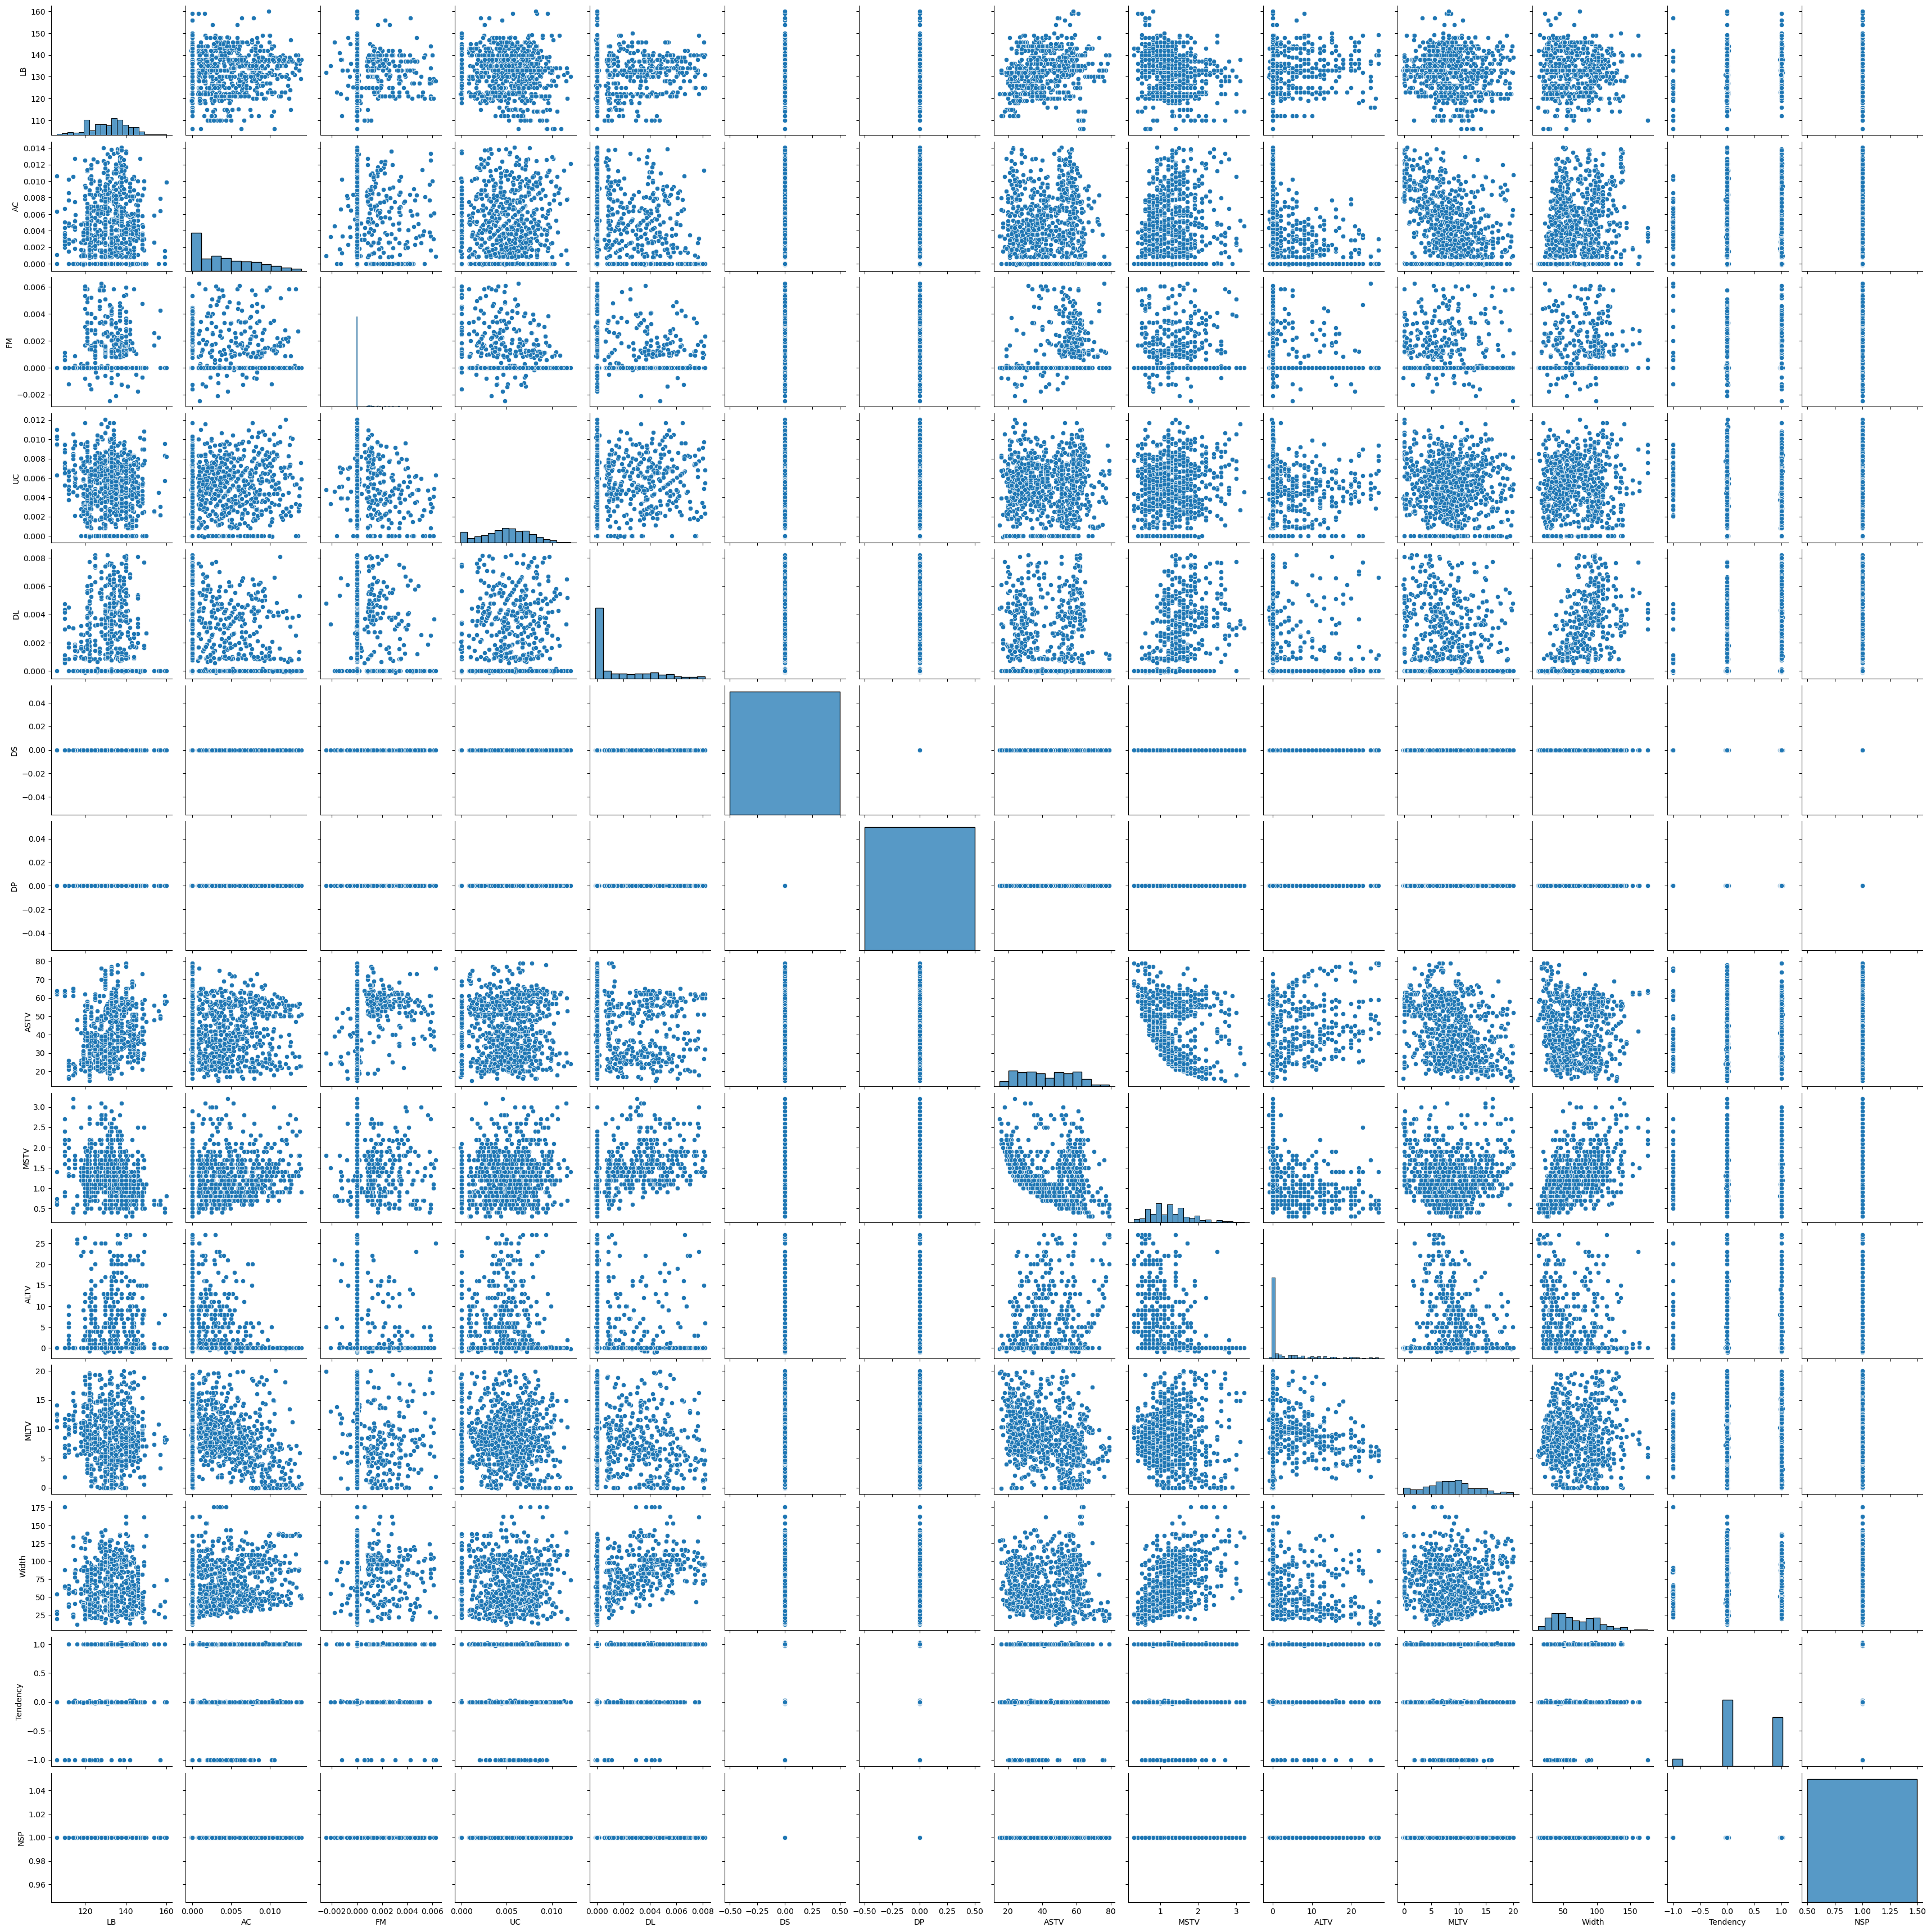

In [13]:
# Pairplot for advanced visualization
sns.pairplot(df)
plt.show()

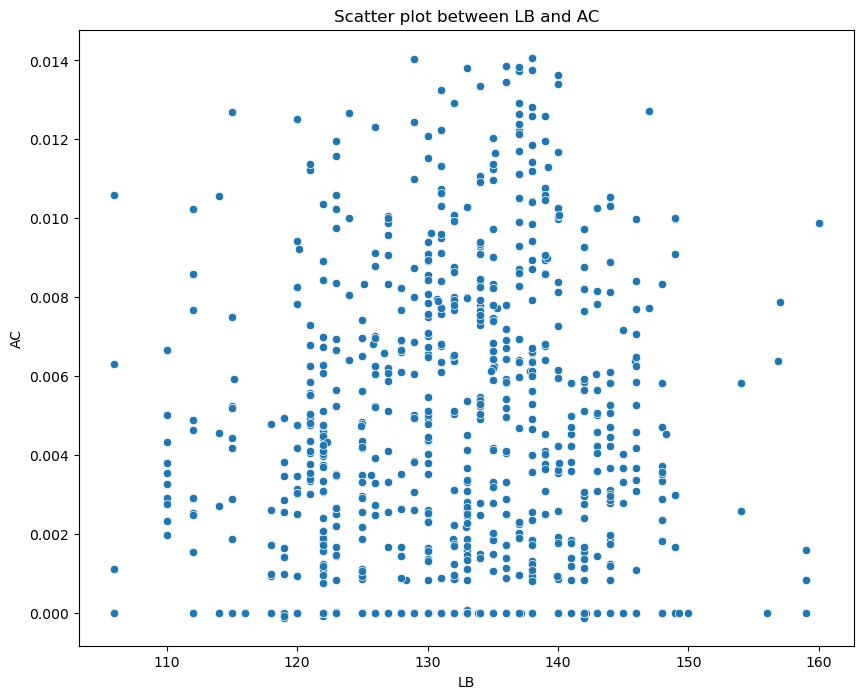

In [14]:
# Pattern Recognition and Insights

# Scatter plots to identify relationships between pairs of variables
plt.figure(figsize=(10,8))
sns.scatterplot(x='LB', y='AC', data=df)
plt.title('Scatter plot between LB and AC')
plt.show()

In [15]:
# Summary of key insights
print("Key Insights and Findings:")
# Add your analysis and interpretations here

Key Insights and Findings:


In [16]:
# Conclusion: Summarize the findings
print("Conclusion: Based on the EDA, the following insights were observed...")

Conclusion: Based on the EDA, the following insights were observed...
